In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data function

In [119]:
def load_data(n=2, score="rouge", dts="training"):
    try:
        file_path = f'visualization_data/{score}-between-sum/{dts}_{score}_{n}sum.csv'
        df = pd.read_csv(file_path, index_col=0, header=[0,1])
    except:
        print("WARNING: No score file at: ", file_path)
        return None
    return df

In [132]:
import json

def load_summary(dts="training"):
    path = f'MuP_dataset/{dts}_complete.jsonl'
    with open(path, 'r') as json_file:
        json_list = list(json_file)
        col_name = ["paper_id","summary"]
    summary_df = pd.DataFrame(columns=col_name)
    for json_str in json_list:
        result = json.loads(json_str)
        df = pd.DataFrame([[result["paper_id"], result["summary"]]], columns=col_name)
        summary_df = pd.concat([summary_df,df])
    #     break
    # (result['paper']).keys()
    return summary_df

# Show dataframe

In [153]:
dts = "training"
df = load_data(n=2, score="rouge", dts=dts)
summary_df = load_summary(dts=dts)

In [154]:

df_min1 = pd.DataFrame(df.min(axis=1, level=0))
# for val in df.min(axis=0).items():
#     print(val)
#     break
df_min2 = df_min1.min()
# for ind in df_min.index:
#     print(ind)
# min_val = df_min2.loc['R1'][0]
# print(min_val)
print(df_min2['R1'])
minR1 = df_min1[df_min1['R1']==df_min2['R1']]
minR1.index[0]

# print(df.index==minR1.index[0])
((df[df.index==minR1.index[0]]))

for summary in summary_df[summary_df["paper_id"]==minR1.index[0]]["summary"]:
    print("="*100)
    print(summary)


0.1114982578397212
The paper deals with one manifestation of safe exploration. Starting from a given safety function that classifies states as safe or unsafe, a modification of MBPO is used to change the Q-function in such a way that unsafe states should not be visited. The method is tested on two benchmarks.
This paper studies *safe* reinforcement learning (RL), in which an RL algorithm is tasked with learning a high-value behavioral policy while simultaneously minimizing the number of safety violations. To frame the work, the paper takes on a few key perspectives. First, that predicting only a few timesteps into the future is all that is needed to prevent safety violations. Second, that safety is defined in terms of the occupancy of set of states, as determined by the \textsc{Unsafe} predicate designed by an engineer. With this predicate in hand, a natural notion of an irrecoverable state is introduced, defined as those states that always lead to an unsafe state under any policy. Thi

/var/folders/zw/q5kx3f693rgfk0h2y_jgmhnm0000gn/T/ipykernel_2513/2594995799.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  df_min1 = pd.DataFrame(df.min(axis=1, level=0))


In [11]:
df2 = pd.DataFrame(load_data(7).mean())
df2

0
R1     1-2  0.299820
       1-3  0.312236
       1-4  0.288123
       1-5  0.288524
       1-6  0.310375
...              ...
RLsum  4-6  0.183276
       4-7  0.157021
       5-6  0.161652
       5-7  0.166731
RLsumS 6-7  0.160112

[84 rows x 1 columns]

In [12]:
df2.reset_index(inplace=True)
df2.groupby("level_0").mean()
df2

/var/folders/zw/q5kx3f693rgfk0h2y_jgmhnm0000gn/T/ipykernel_2513/984980836.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby("level_0").mean()


,level_0,level_1,0
0,R1,1-2,0.299820
1,R1,1-3,0.312236
2,R1,1-4,0.288123
3,R1,1-5,0.288524
4,R1,1-6,0.310375
...,...,...,...
79,RLsum,4-6,0.183276
80,RLsum,4-7,0.157021
81,RLsum,5-6,0.161652
82,RLsum,5-7,0.166731


# Plot density graph (get_dens, get_val)

In [129]:
def get_val(df, score, sub_score, rep):
    val = df[sub_score].values
    if rep=="mean":
        val = val.mean(axis=1)
    elif rep=="max":
        val = val.max(axis=1)
    elif rep=="min":
        val = val.min(axis=1)
    else:
        return ("rep not correct")
    return val
        

def get_dens(n=2, score='rouge', sub_score='', rep="mean", save=True):
    if score == 'rouge':
        xlim = [0,1]
    elif score == 'bertscore':
        xlim = [-.5,1]
    df_trian = load_data(n, score, "training")
    df_val = load_data(n, score, "validation")

    fig, ax = plt.subplots()

    train_value = get_val(df_trian, score, sub_score, rep)
    df_train_new = pd.DataFrame(train_value, columns=["Training"])
    df_train_new['Training'].plot(kind='density', ax=ax, xlim=xlim, legend=True)
    if type(df_val) == pd.core.frame.DataFrame:
        val_value = get_val(df_val, score, sub_score, rep)
        df_val_new = pd.DataFrame(val_value, columns=["Validation"])
        df_val_new['Validation'].plot(kind='density', ax=ax, xlim=xlim, legend=True)
    ax.set_xlabel(f"{score.upper()} {sub_score}")

    title = f"{score.upper()} {sub_score}: {n} summaries"

    if n>2:
        title = title + f' ({rep})'
    ax.set_title(title)
    if save:
        path = f"visualization_data/{score}-between-sum-graph/{sub_score}_{n}sum_{rep}.png"
        plt.savefig(path)
    # plt.show()


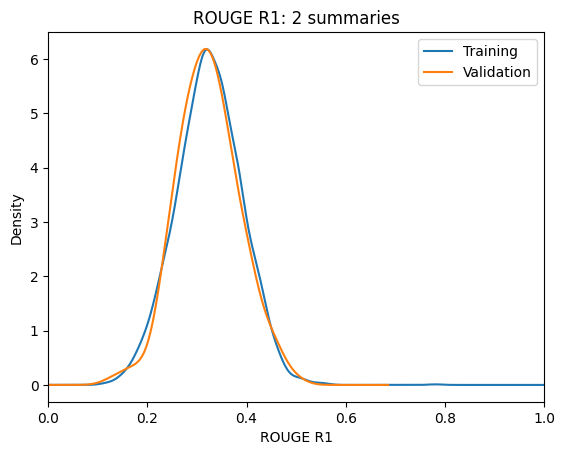

In [87]:
get_dens(2, sub_score='R1', rep="mean", save=False)

# ROUGE visualization

/var/folders/zw/q5kx3f693rgfk0h2y_jgmhnm0000gn/T/ipykernel_2513/2014345382.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


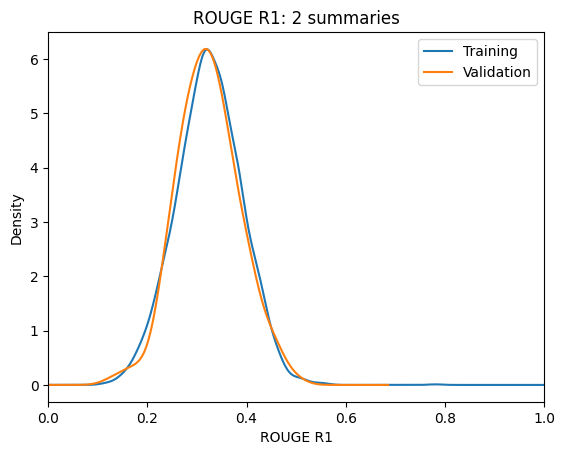

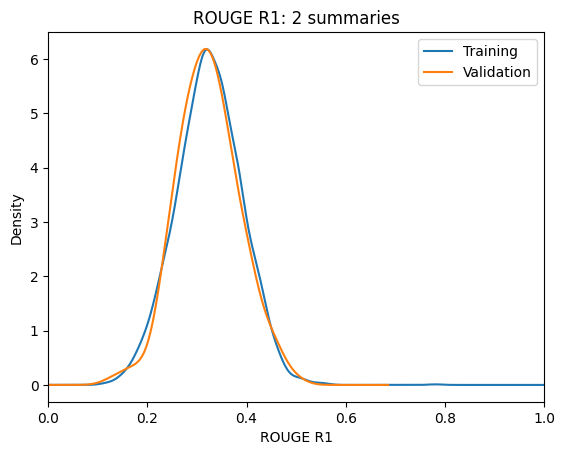

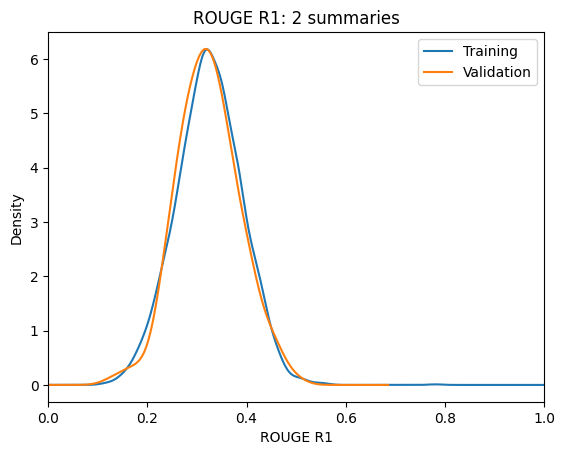

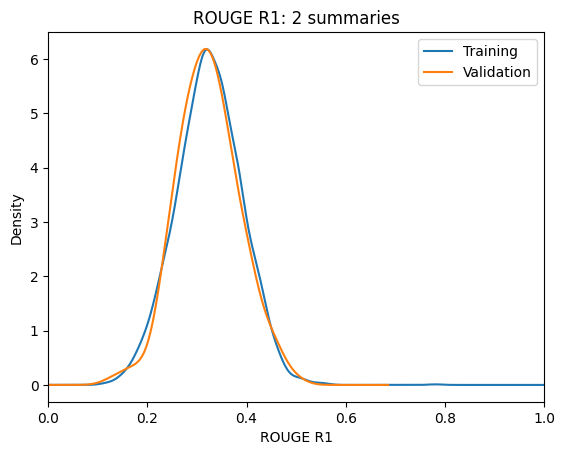

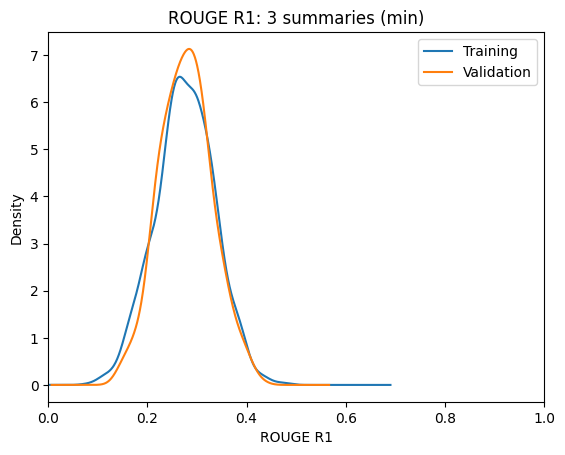

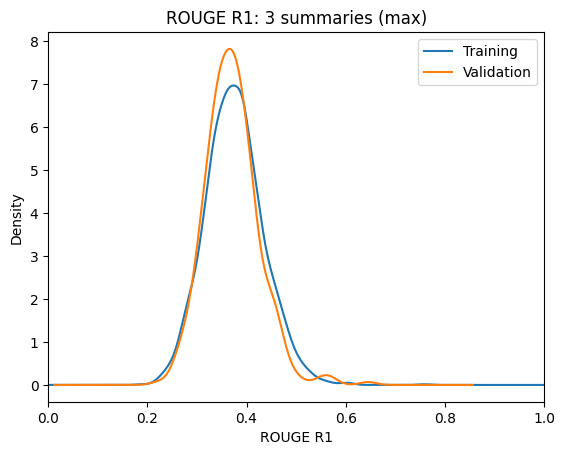

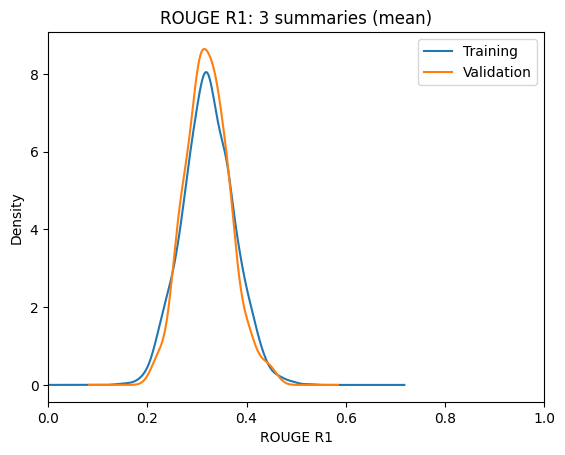

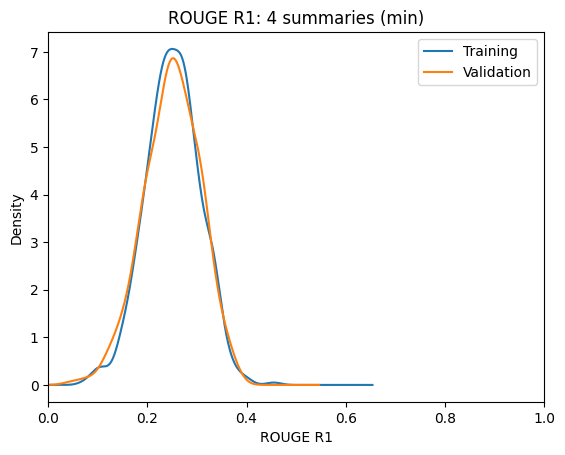

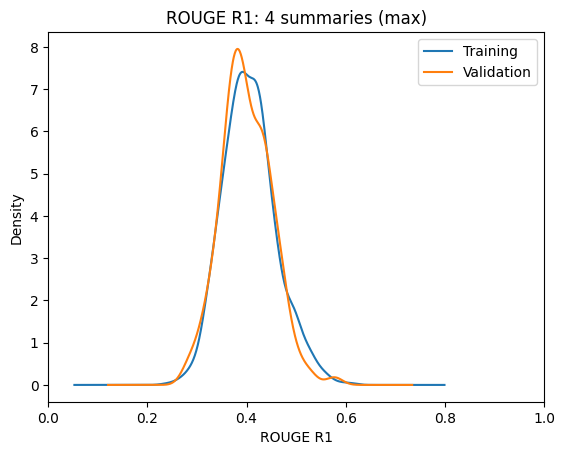

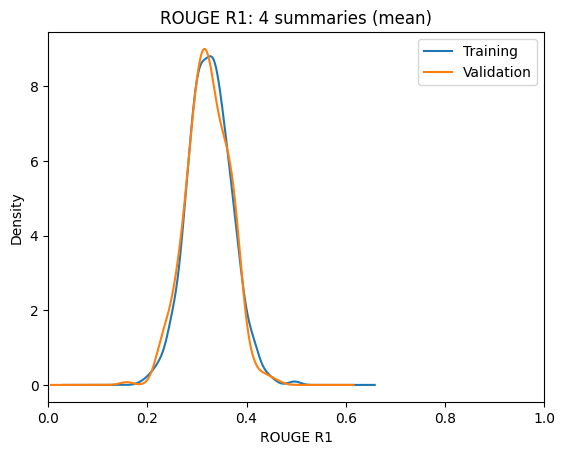

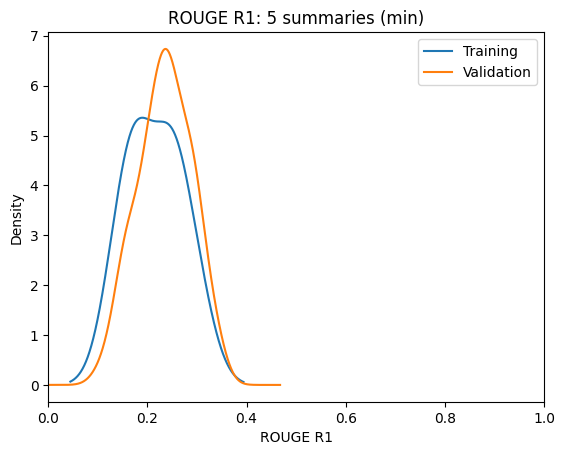

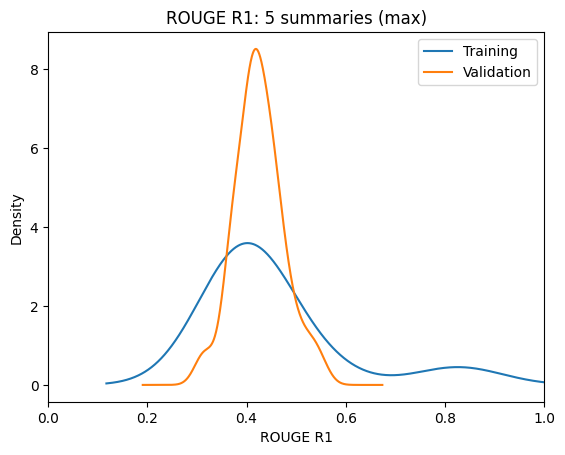

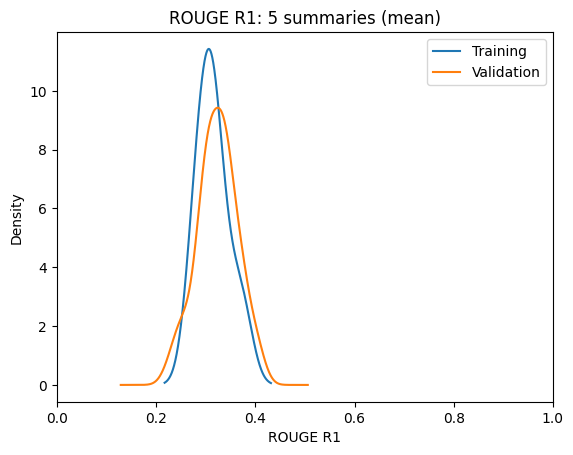

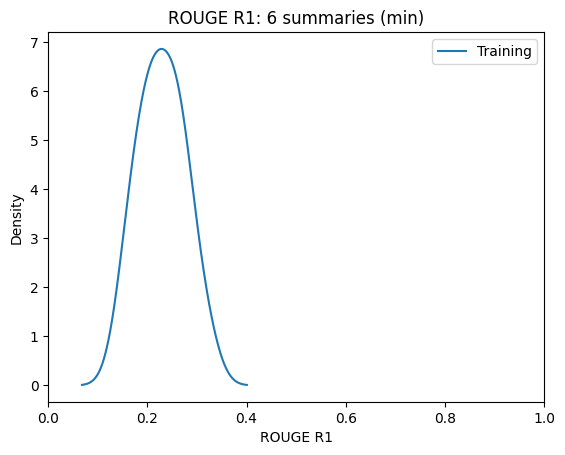

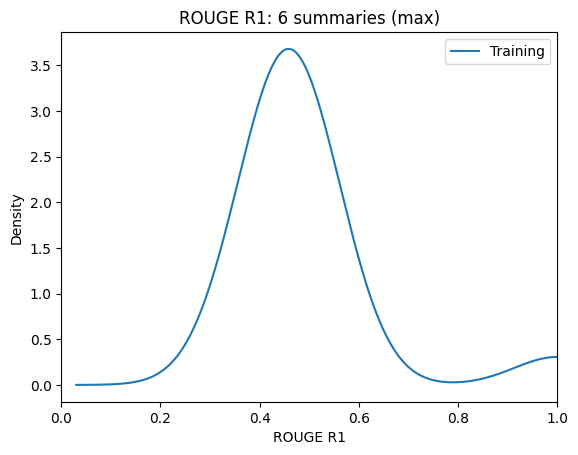

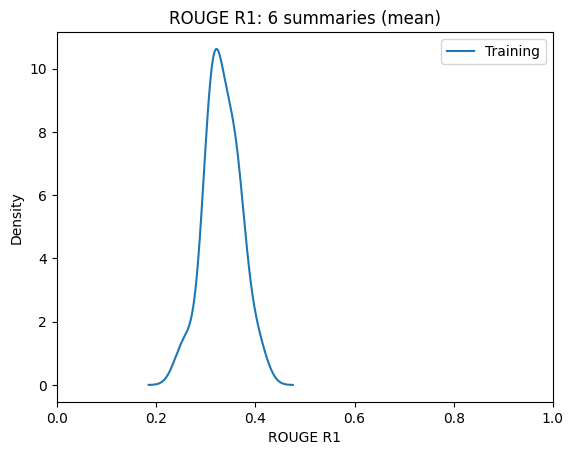

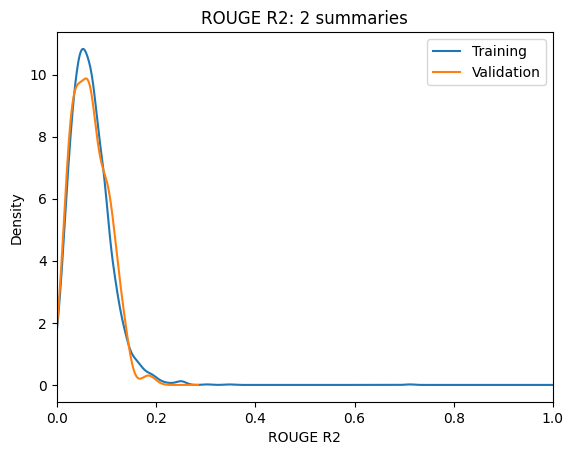

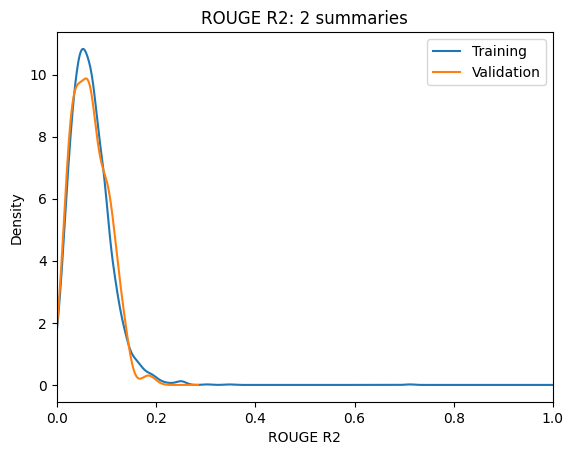

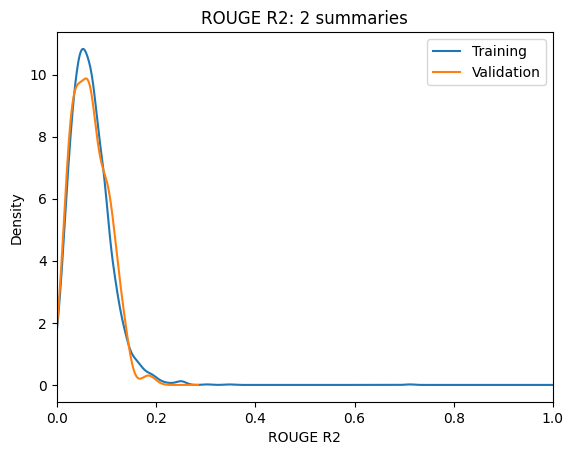

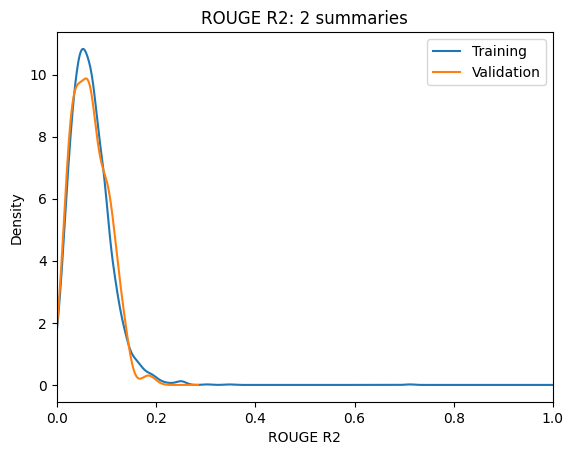

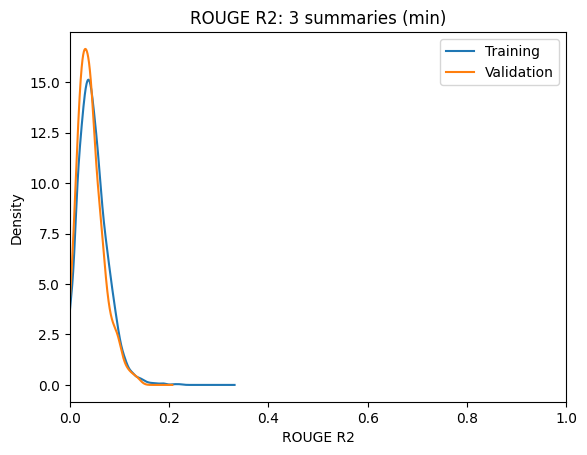

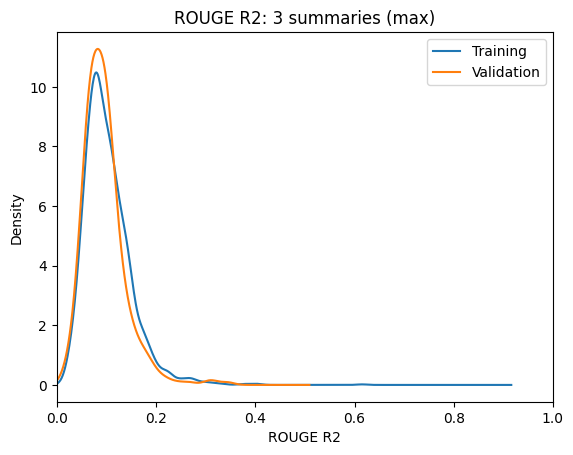

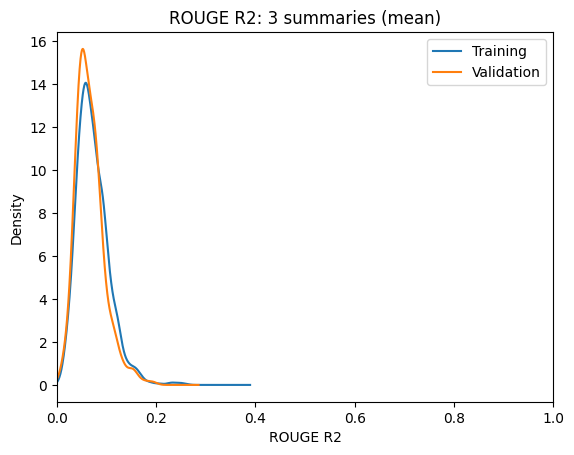

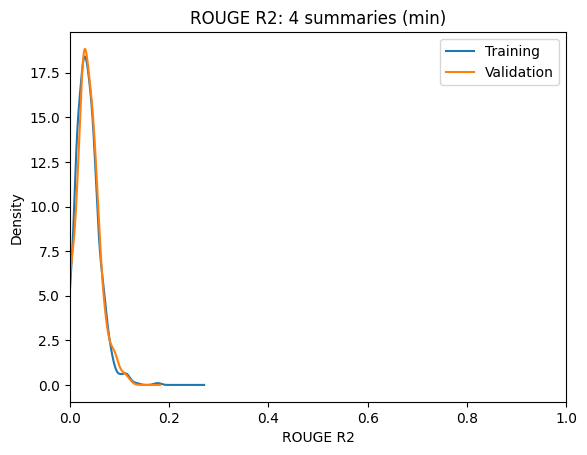

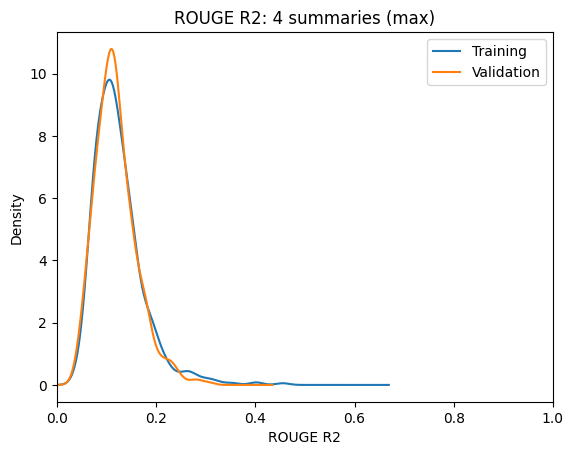

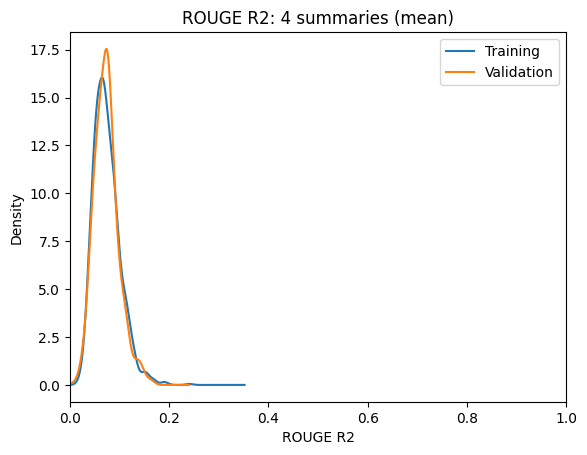

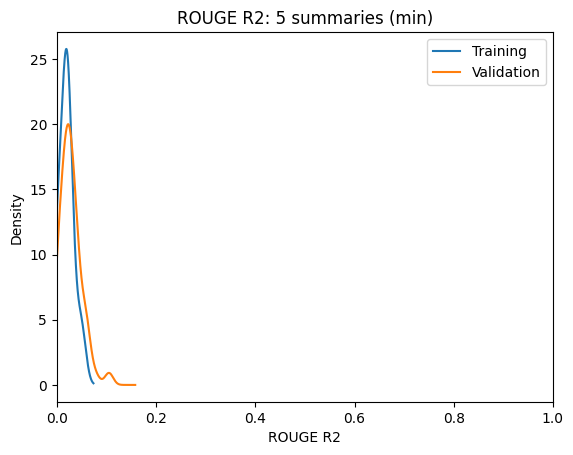

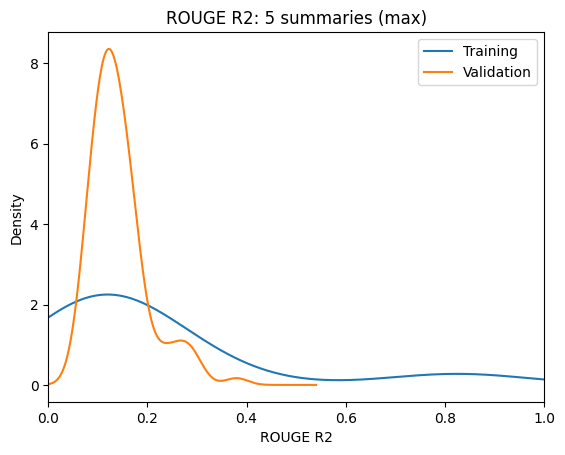

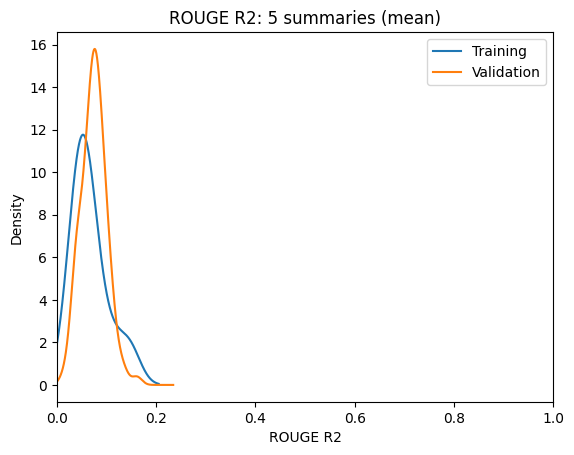

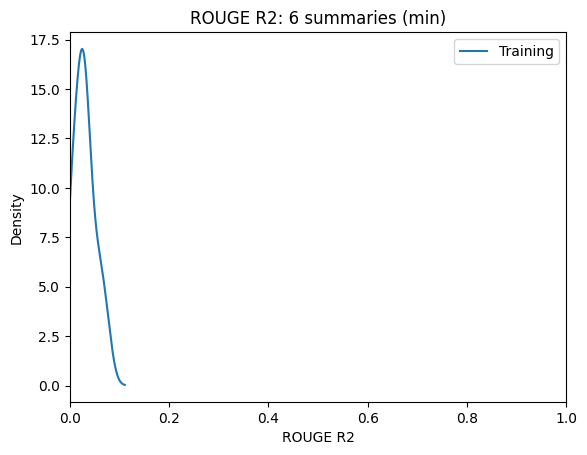

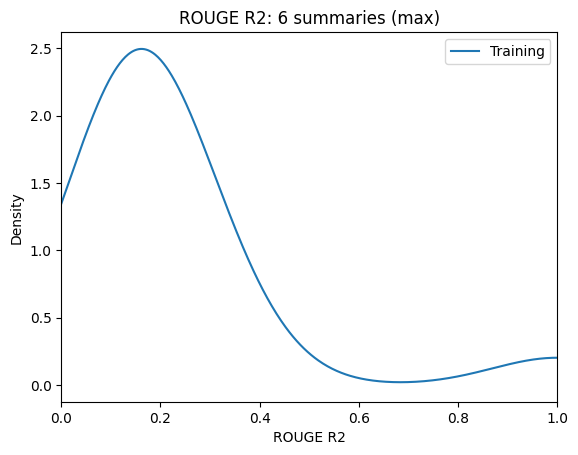

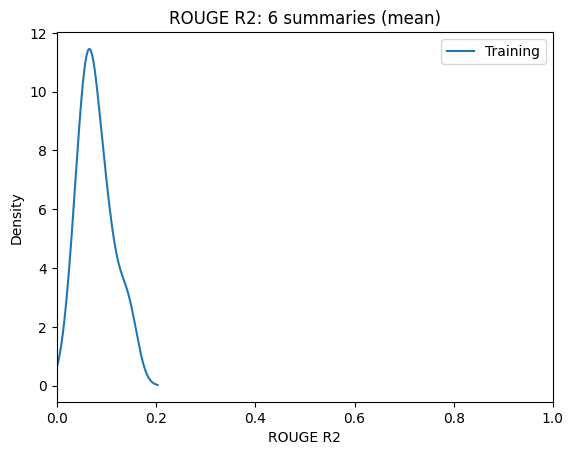

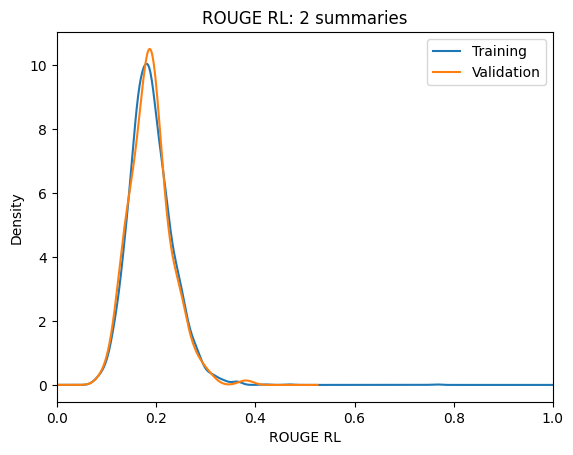

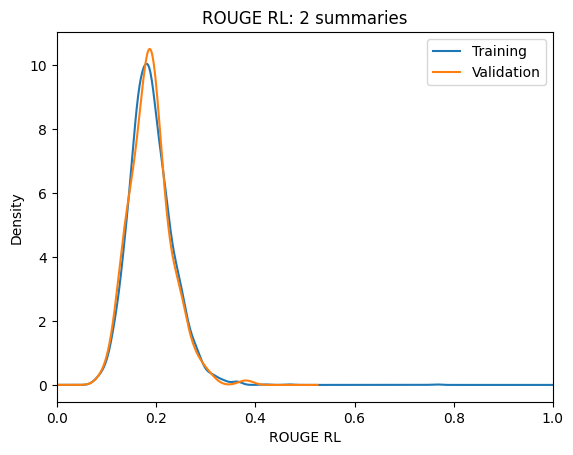

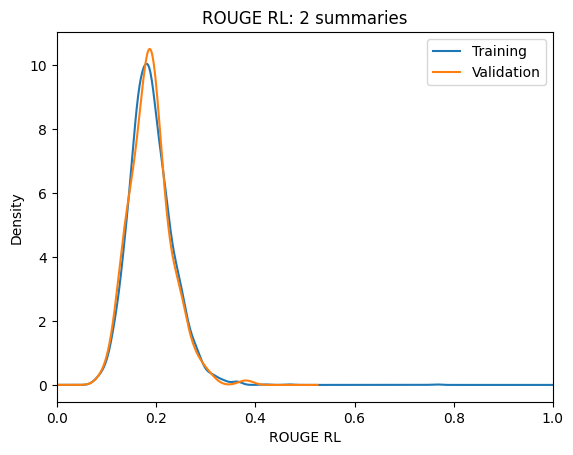

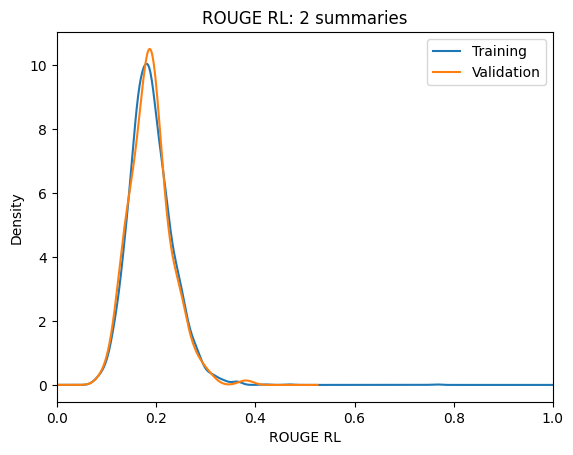

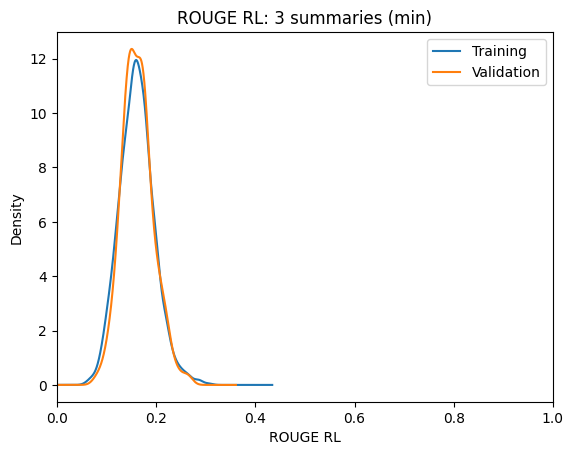

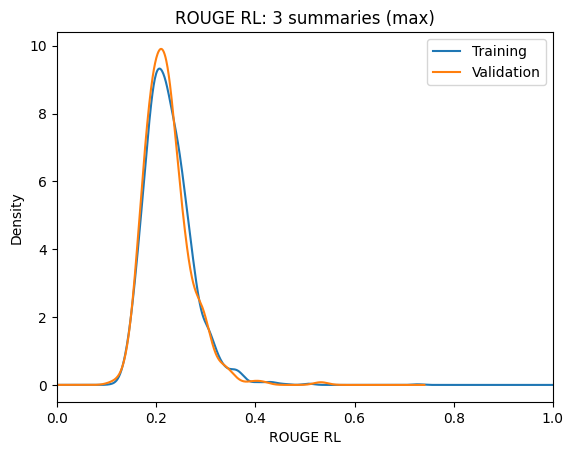

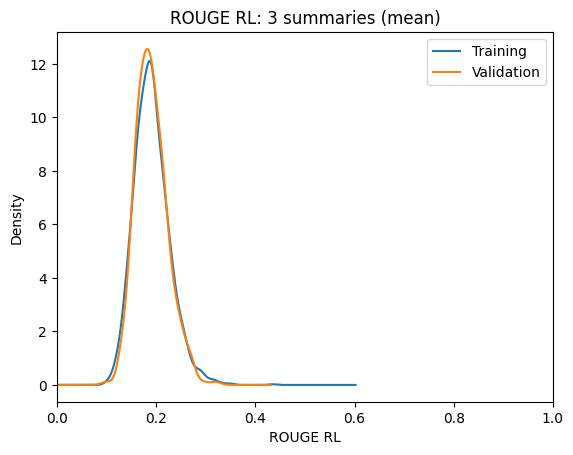

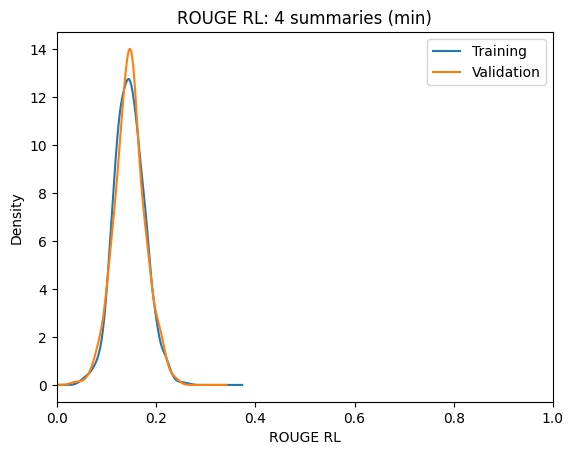

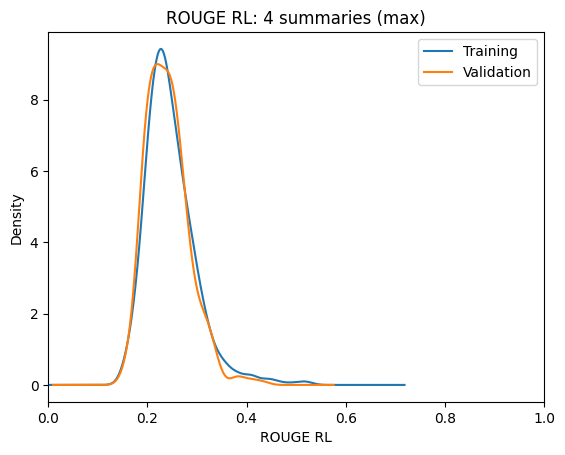

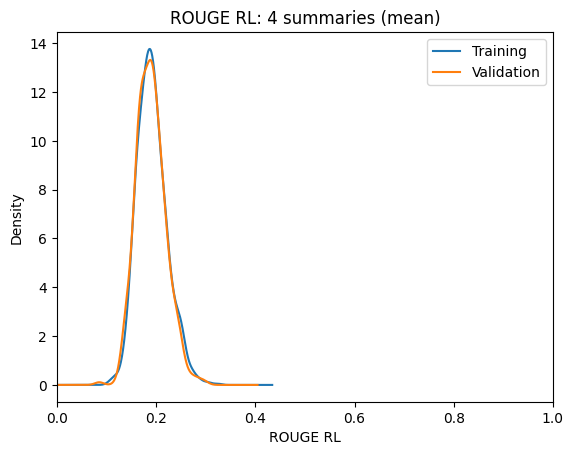

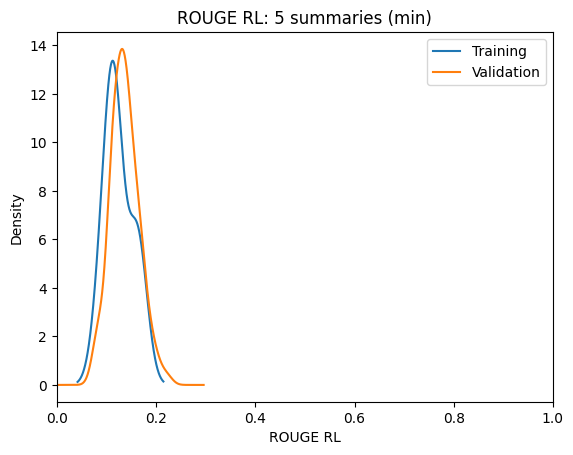

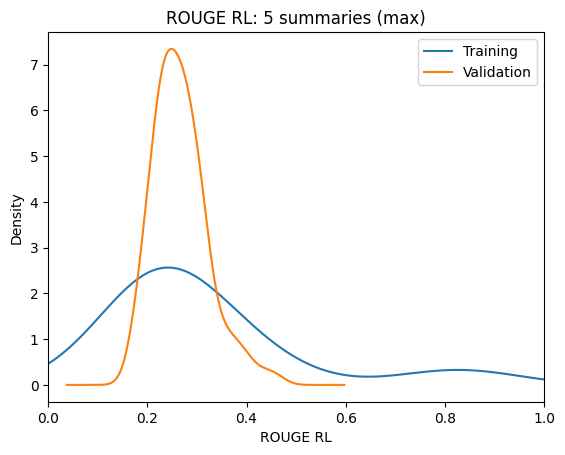

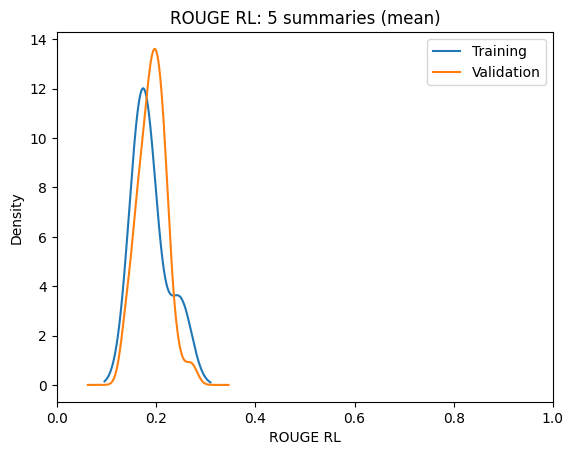

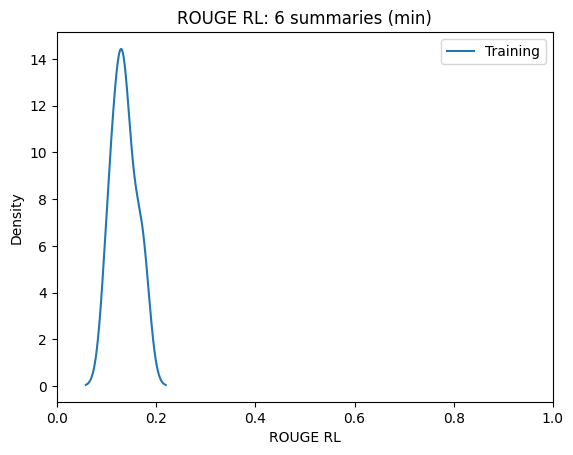

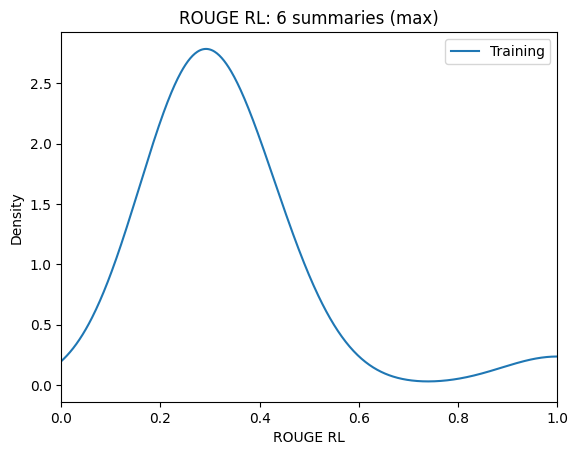

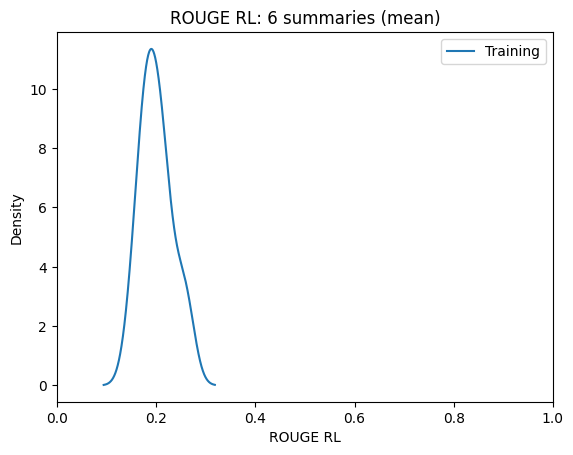

In [128]:
score = "rouge"
sub_scores = ["R1", "R2", "RL"]
save = True
for sub_score in sub_scores:
    get_dens(2, score=score, sub_score=sub_score, save=save)
    for n in range(2, 7):
        for r in ["min", "max", "mean"]:
            # get_dens(n, score=s, rep=r)
            get_dens(n, score=score, sub_score=sub_score, rep=r, save=save)

# BertScore visualization

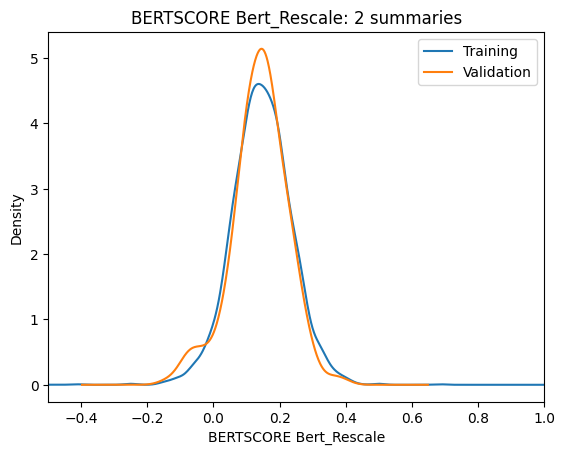

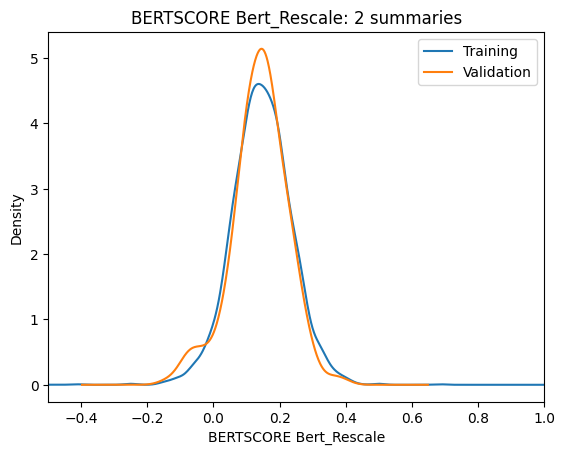

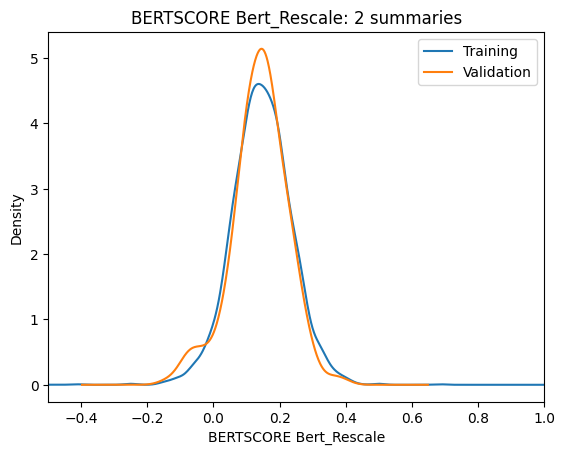

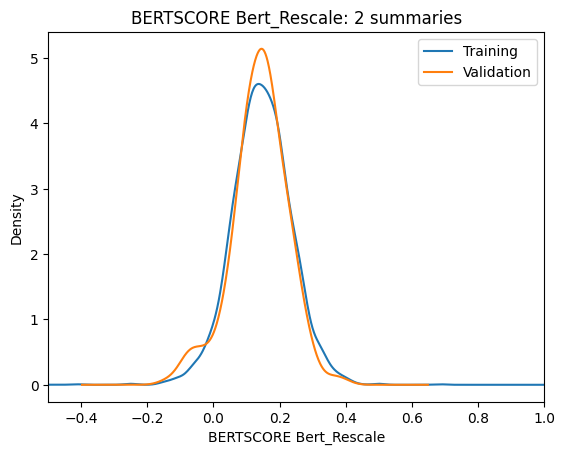

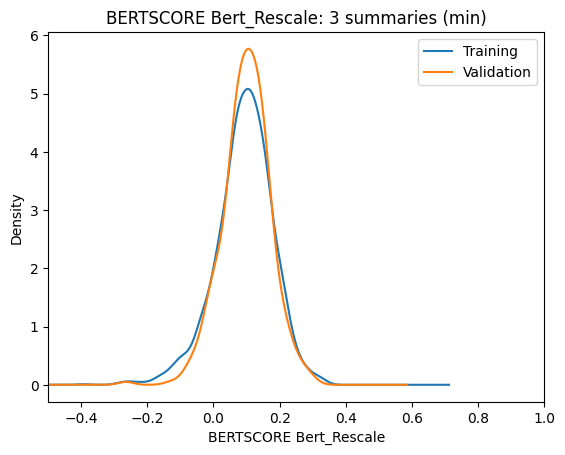

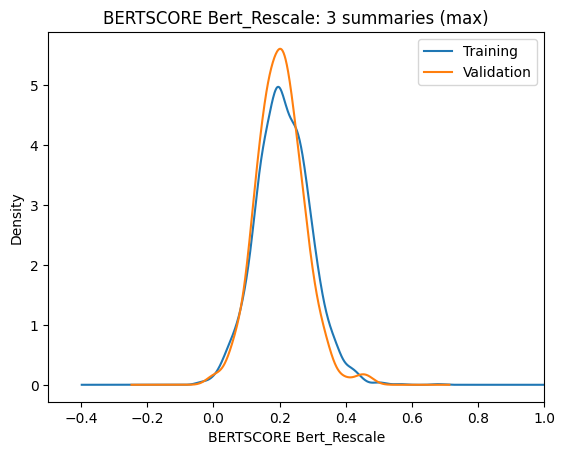

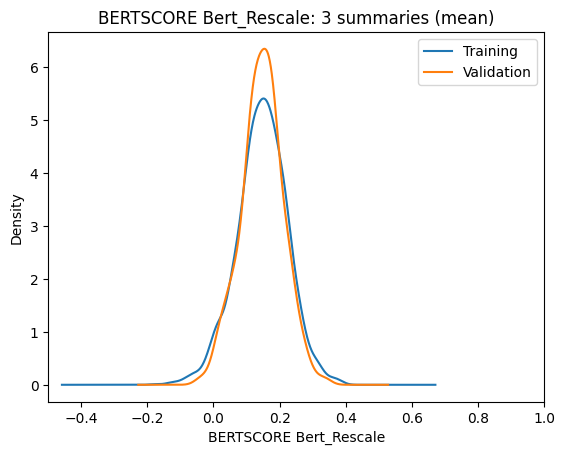

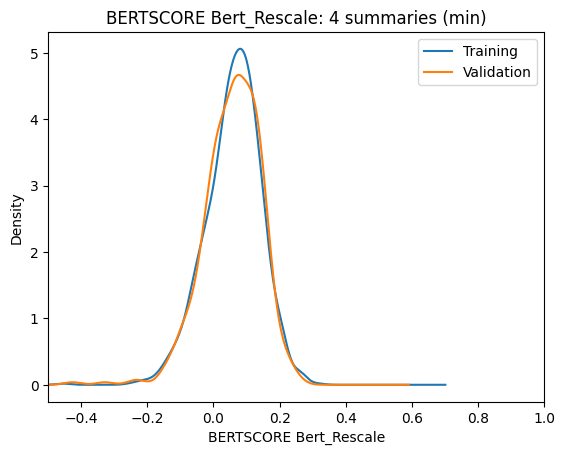

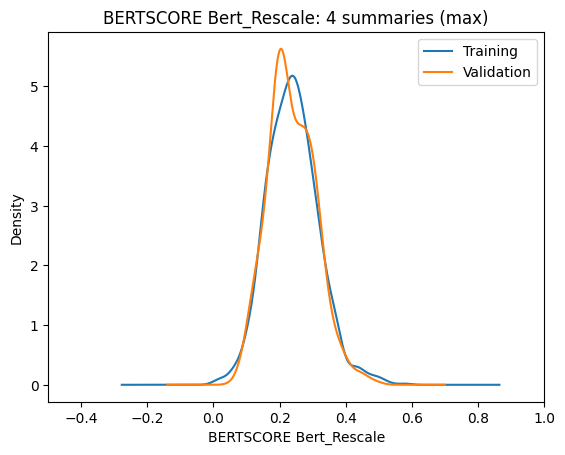

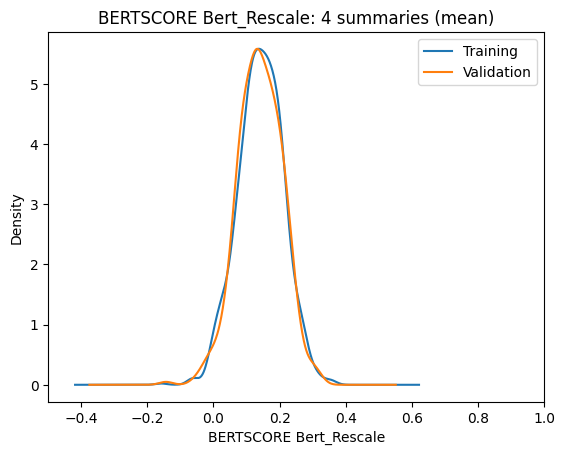

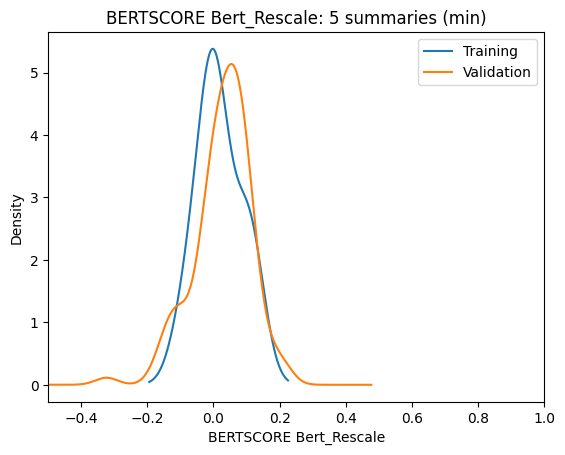

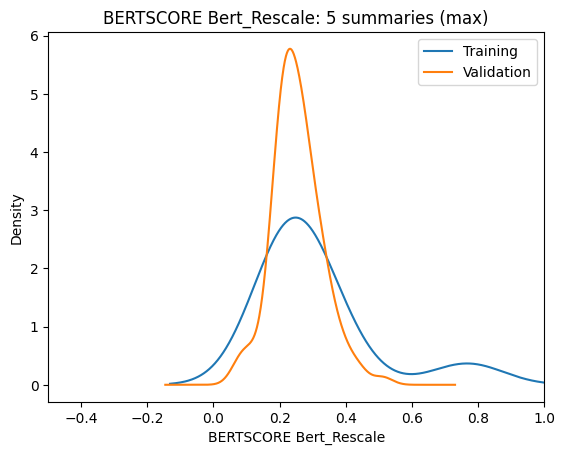

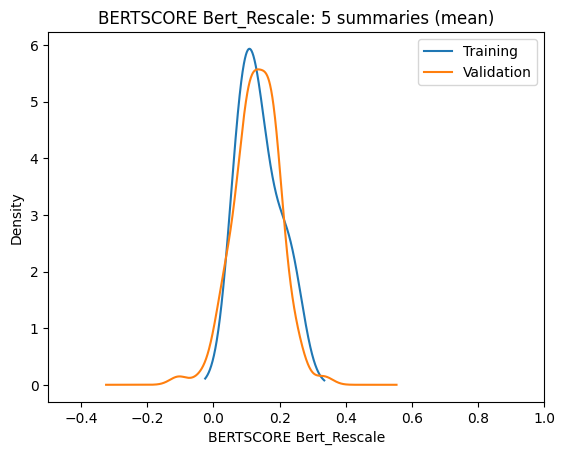

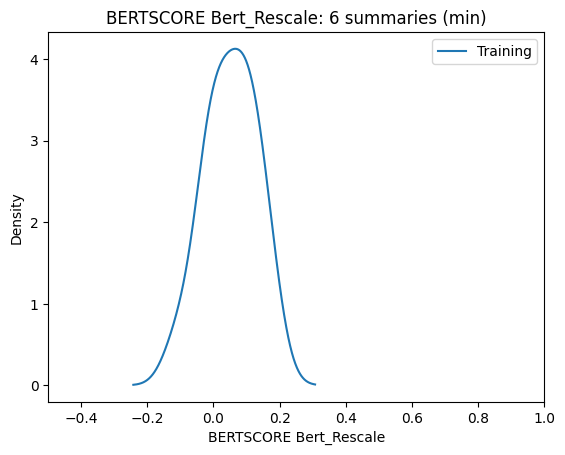

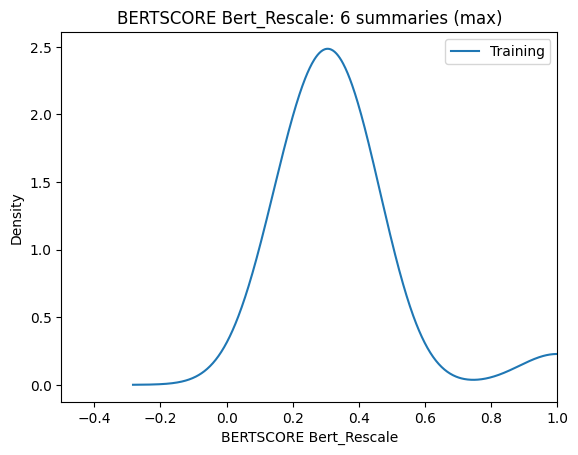

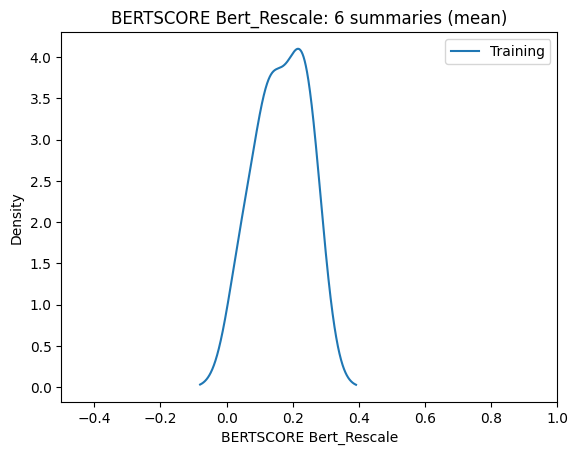

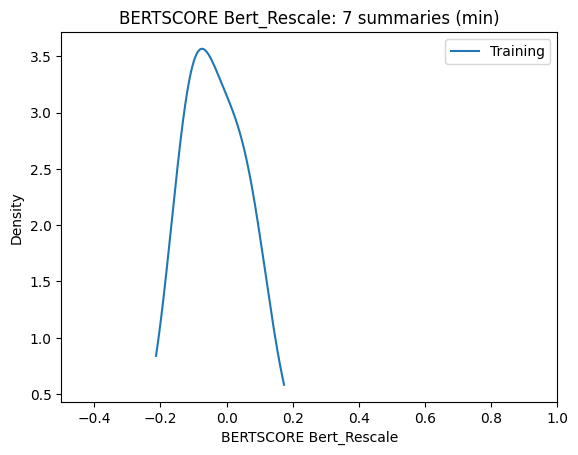

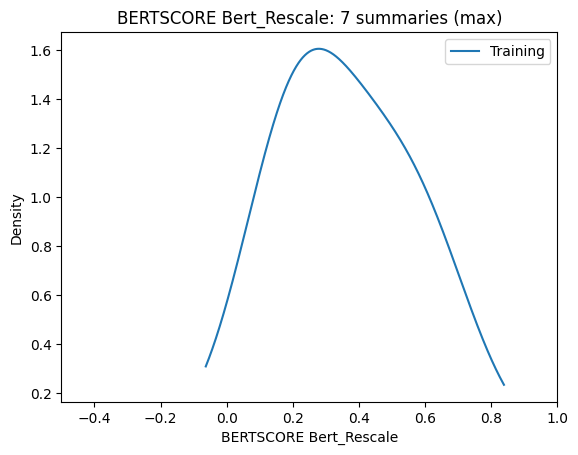

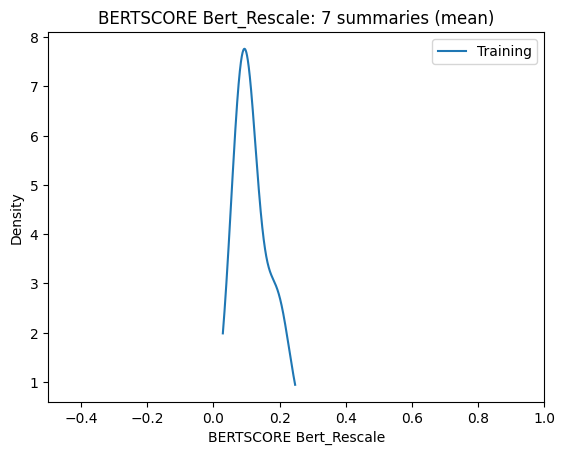

In [130]:
score = "bertscore"
sub_scores = ["Bert_Rescale"]
save = True
for sub_score in sub_scores:
    get_dens(2, score=score, sub_score=sub_score, save=save)
    for n in range(2, 8):
        for r in ["min", "max", "mean"]:
            # get_dens(n, score=s, rep=r)
            get_dens(n, score=score , sub_score=sub_score, rep=r, save=save)